<a href="https://colab.research.google.com/github/jaavilla/jaavilla.github.io/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression: extending linear models with basis functions

[link](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.19.5
1.1.5
3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
0.22.2.post1


$$y = X^3 + 100 + \epsilon$$

Lets recreate the formula above in python.


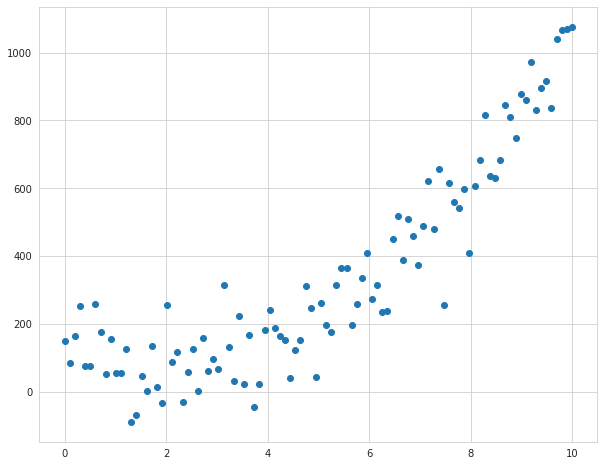

In [3]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)                #this will have 100 steps between 0-10
rng = np.random.randn(n_samples) * 100     #this will be our error term 

y = X ** 3 + 100 + rng

plt.figure(figsize=(10,8));
plt.scatter(X, y);


We will first try to use linear regression to approximate, then we will use non-linear regression to see the difference in accuracy. 


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.7643394574930141


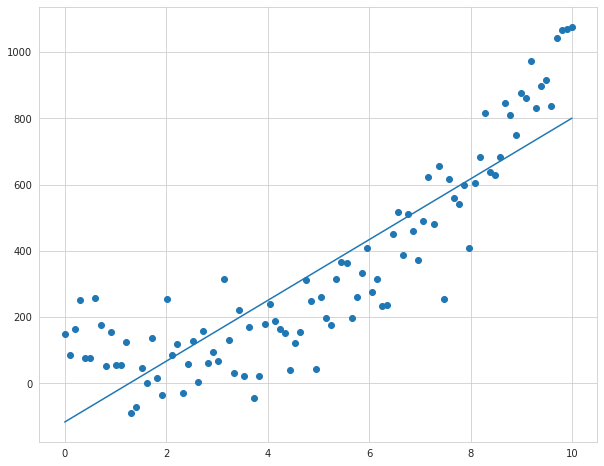

In [5]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

## Polynomial

In [9]:
from sklearn.preprocessing import PolynomialFeatures          #lets import our library from sklearn where the model lives

In [18]:
degree_three = PolynomialFeatures(degree=3)               #this is a polynomial of x to the third degree
example = degree_three.fit_transform(X.reshape(-1, 1))

In [23]:
lin_reg_2 = LinearRegression()                  #insantiate
lin_reg_2.fit(X_poly, y.reshape(-1, 1))         #fit the data
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


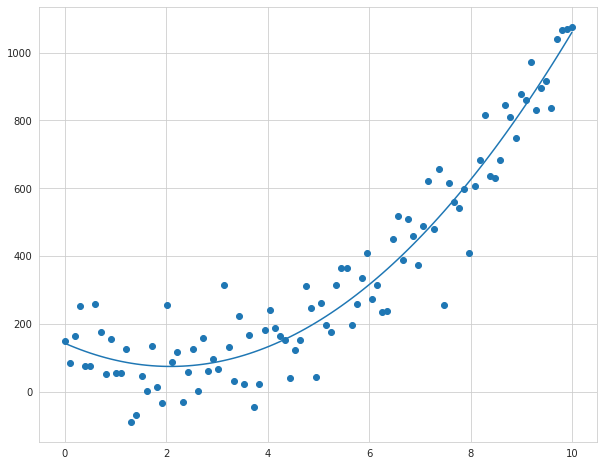

In [24]:
plt.figure(figsize=(10,8));                     #create the plot
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

## Boston Housing Dataset 

Lets create a real worl problem with the dataset we have at hand and see what would best fit the model. 


In [25]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data        #grab the data

--2021-07-27 22:37:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [application/x-httpd-php]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.02s   

2021-07-27 22:37:36 (2.02 MB/s) - ‘housing.data’ saved [49082/49082]



In [26]:
df_boston = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#sns.pairplot(df_boston, size=1.5);

In [27]:
pd.options.display.float_format = "{:,.2f}".format
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [28]:
X_boston = df_boston['DIS'].values          #DIS = weighted distances to five Boston employment centres
y_boston = df_boston['NOX'].values          #nitric oxides concentration (parts per 10 million)

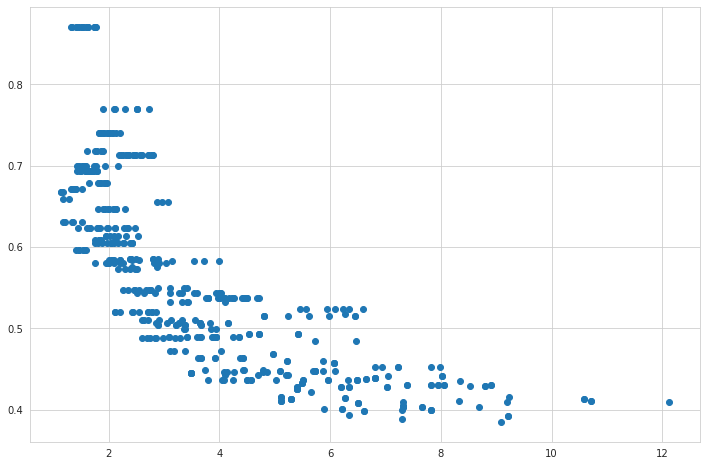

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

Right away we can tell this is not a linear nor quadratic formula that would best fit this data. This looks more like a $cubic$ function most likely. 


## Cubic

In [30]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()        #instantiate 

In [31]:
lin_reg_3.fit(X_poly_b, y_boston)         #fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]         #independent variable

In [33]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))     #dependent variable

R^2 score = 0.71


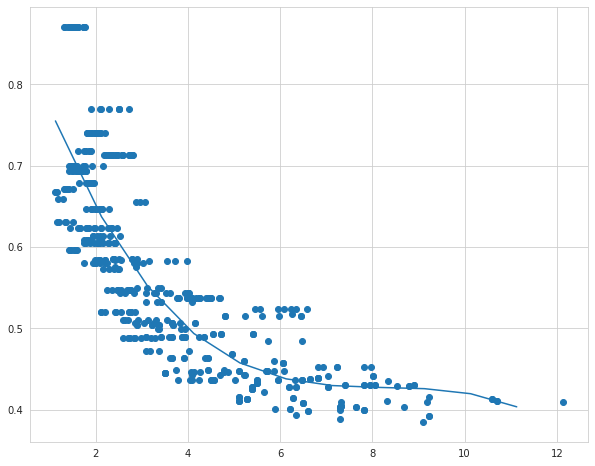

In [34]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))      #plot

Looks better but looks like we have a some sort of deviation towards the end.